# Morphological operations

This part of the course is about operations to analyse shapes and form of objects.

Run the code making sure you understand the syntax. Complete the parts marked TODO.

## Setup

First, we need to import some packages so that their functions are available to us.

In [2]:
import os                       # operating system operations like file paths etc
import numpy as np              # multidimensional arrays, linear algebra
from skimage import morphology  # morphological operations
from skimage import io          # to load and save data
from skimage import color       # color conversion utilities
import matplotlib.pyplot as plt # plotting


path_to_images= '../data'    # where the images are relative to this notebook

## Data loading and exploration

The data for this notebook is from the [Munich AML Morphology Dataset](https://www.cancerimagingarchive.net/collection/aml-cytomorphology_lmu/), which consists of single-cell images taken from blood of patients with Acute Myeloid Leukemia at the Münich University Hospital, using a digital microscope. Here, we're using an image of a basophil, a type of white blood cell (leukocyte).

So, let's load the image and look at it.

Text(0.5, 1.0, 'Original image')

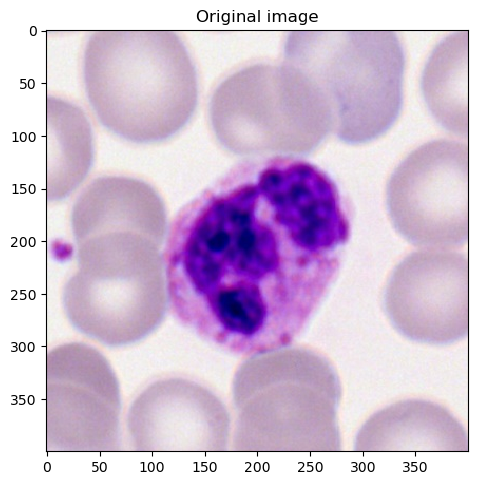

In [3]:
# Load the Basophil image
image_file = os.path.join(path_to_images, 'BAS_0001.tiff')
img = io.imread(image_file)
#print(img.shape)
img = np.delete(img,3,2) # remove the last channel (alpha)
#print(img.shape)

# Display the image
plt.figure()
io.imshow(img)
plt.title('Original image')

## Image preprocessing

Morphological operations typically work on binary data (zeros = black pixels and ones = white pixels ), but here we have a color image. So let's convert to grayscale first, and then binarize the image.

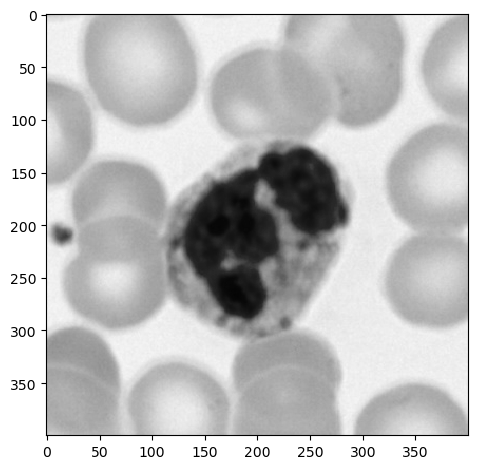

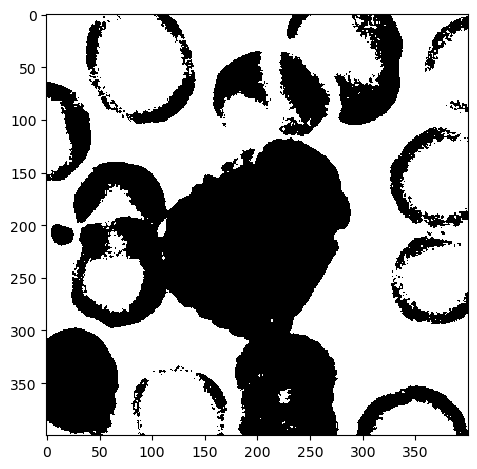

In [4]:

# Convert image to grayscale
gray_img = color.rgb2gray(img)
io.imshow(gray_img)
io.show()

# Binarize the grayscale image with a threshold
threshold = 0.7           # Experiment with this your desired threshold value
binary_img = gray_img > threshold
io.imshow(binary_img)
io.show()


TODO: Experiment with changing the threshold between 0 and 1, and observe the results. What happens with a threshold at 0.3? 0.4? 0.5? 0.6 ?

As you can see, it's not trivial to get the right threshold that shows only the basophil we are interested in, in the center of the image.

## Structuring Elements

Let's examine how to create and display structuring elements.
The doc for this part is found in [skimage.morphology](https://scikit-image.org/docs/stable/api/skimage.morphology.html). Note that skimage calls SEs "footprints".

Created structuring element of shape (3, 3)


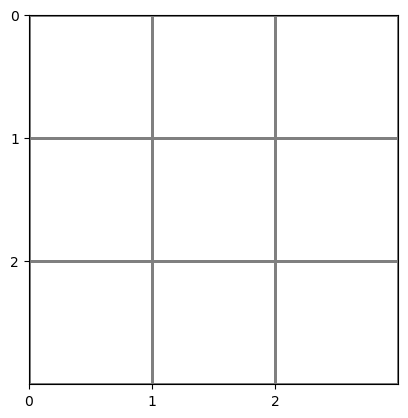

In [54]:
# Let's  create a 3x3 square structuring element (SE)
se_size=3
my_se=morphology.square(se_size)
print(f'Created structuring element of shape {my_se.shape}')

# Display SE with pixel boundaries
plt.pcolormesh(my_se, edgecolors='gray', linewidth=2, vmin=0, vmax=1,cmap='gray')
plt.xticks(np.arange(0, my_se.shape[1]))
plt.yticks(np.arange(0, my_se.shape[0]))
ax = plt.gca()
ax.set_aspect('equal')  # make image square
ax.invert_yaxis()       # match numpy convention top left is (0,0)


# TODO create a disk SE (morphology.disk) and display it. Copy-paste the code from above and modify it.



## Erosion and Dilation

## Opening and Closing